In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
df = pd.read_csv("../data/data.csv")

## Cleaning and making 'price', 'mileage' columns numerical and ready to work with

In [3]:
df['price'] = df['price'].str.replace('€', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.strip()
df['price'] = pd.to_numeric(df['price'])

In [4]:
df.loc[df["mileage"].notna(), "mileage"] = df["mileage"].replace('-', np.nan)
df.loc[df["mileage"].notna(), "mileage"] = df["mileage"].replace("tūkst.", "", regex=True)
df.loc[:, "mileage"] = df["mileage"].str.strip()
df.loc[:,'mileage'] = pd.to_numeric(df['mileage'])

## Removing duplicates that may been saved when scraping

In [5]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

## Feature engineering

In [25]:
## There is no need for car year as is, we can replace it with age
df["age"] = 2023 - df["year"] 
df = df.drop(columns="year")

In [26]:
df.head(5)

,brand,model,engine,mileage,price,age
0,Alfa Romeo,Stelvio,2.0,88.0,24850,4
1,Alfa Romeo,Stelvio,2.0,91.0,34500,3
2,Alfa Romeo,156,2.0,NaN,1800,23
3,Alfa Romeo,159,2.0D,343.0,1850,13
4,Alfa Romeo,Giulia,2.2D,NaN,20990,7


## Data visualization

### Price VS Age

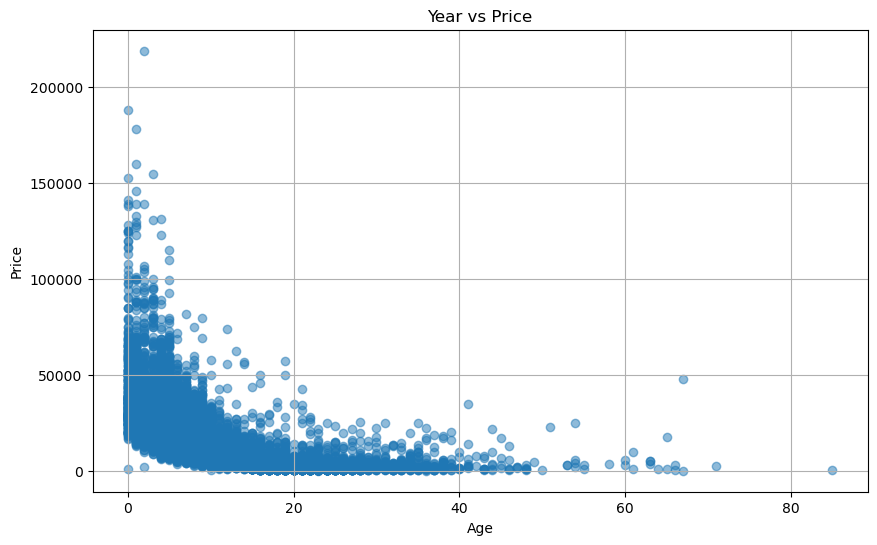

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['price'], alpha=0.5)
plt.title('Year vs Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Price VS Mileage

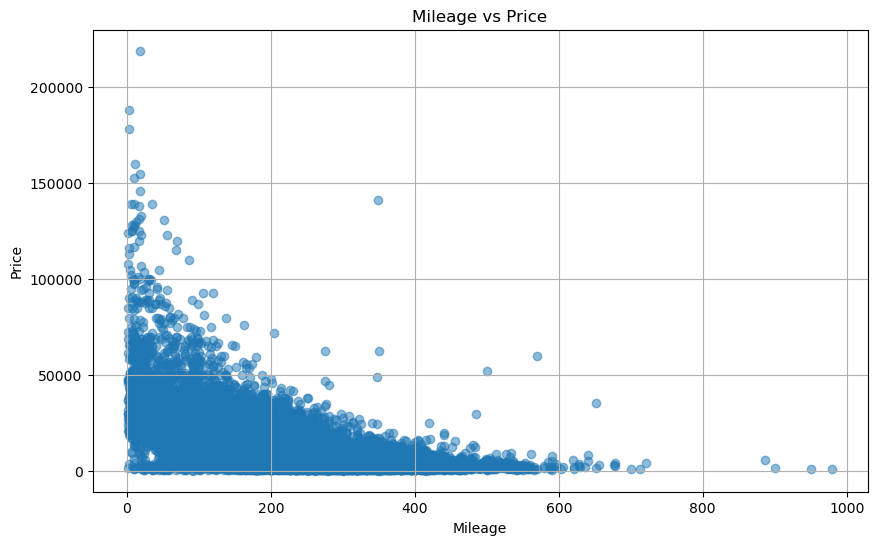

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df['mileage'], df['price'], alpha=0.5)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Correlation matrix

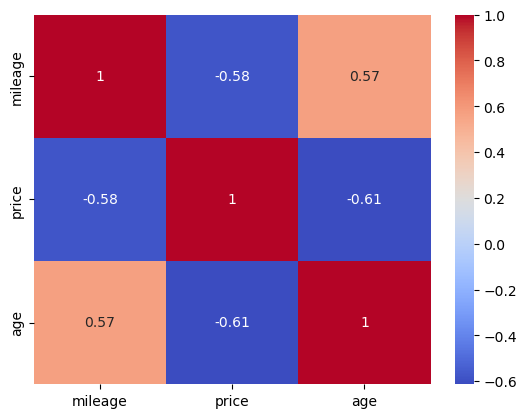

In [30]:
correlation_matrix = df[['mileage', 'price', 'age']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

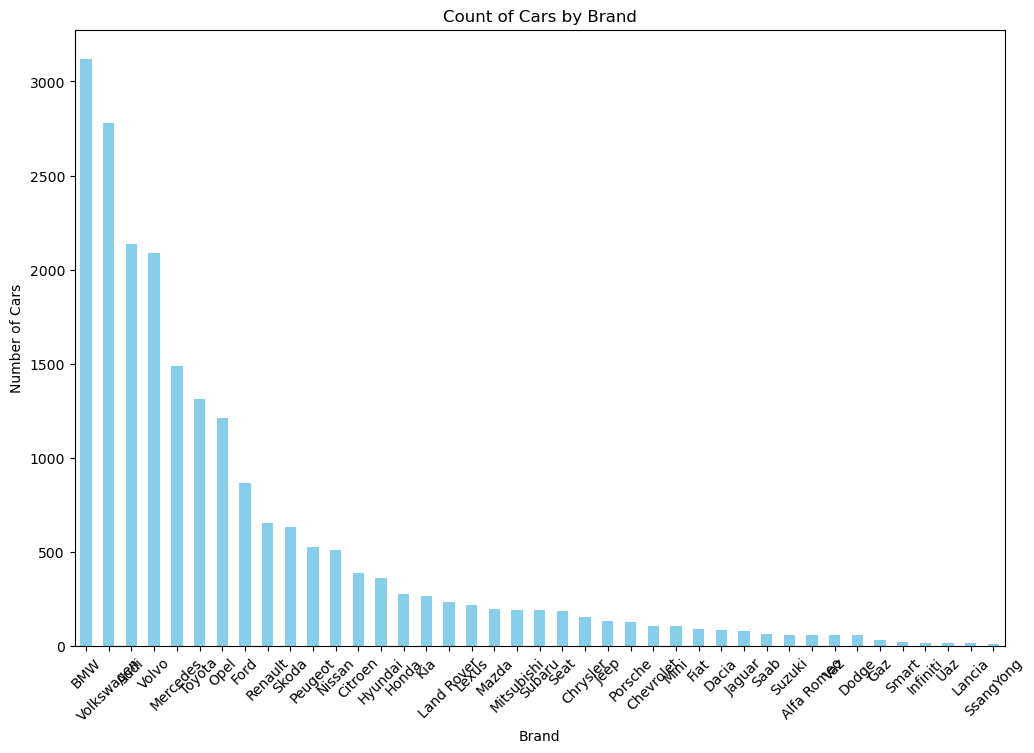

In [31]:
brand_count = df['brand'].value_counts()

plt.figure(figsize=(12, 8))
brand_count.plot(kind='bar', color='skyblue')  
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.title('Count of Cars by Brand')
plt.xticks(rotation=45) 
plt.show()

## Handling NaNs -- median imputing + binary column that tells if value was imputed

In [9]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)

In [10]:
for column in df.columns:
    if sum(df[column].isna()) != 0:
        print(f"NaNs in {column}")
    else:
        print(f"{column} has no NaNs")

brand has no NaNs
model has no NaNs
engine has no NaNs
NaNs in mileage
price has no NaNs
age has no NaNs


In [11]:
nan_indices = df['mileage'].isna()
df['mileage'] = imputer.fit_transform(df[['mileage']])
df['mileage_inputed'] = nan_indices.astype(int)

In [12]:
any(df["mileage"].isna()) 

False

## Encoding categorical features (one-hot)

In [13]:
df = pd.get_dummies(df, columns=['brand', 'model' ,'engine'])

In [14]:
df.shape ### Big increase in size, but it encoding is crucial

(21102, 974)

## Scaling numerical columns 

In [15]:
num_names = ['age', 'mileage']
num_cols = df[num_names]

scaler = MinMaxScaler(feature_range=(-1, 1))

scaled_nums = scaler.fit_transform(num_cols)

df[num_names] = scaled_nums

joblib.dump(scaler, "minmax.save")

['minmax.save']

## Dataset ready -- export

In [148]:
df.to_csv("../data/cleaned_data.csv", index = False)

In [21]:
## Save sample to use columns when converting user input for inference
sample = df.iloc[0]
sample.loc[:] = 0
sample.to_pickle("../utils/sample.pkl")

/tmp/ipykernel_9454/3325259090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.loc[:] = 0
